In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

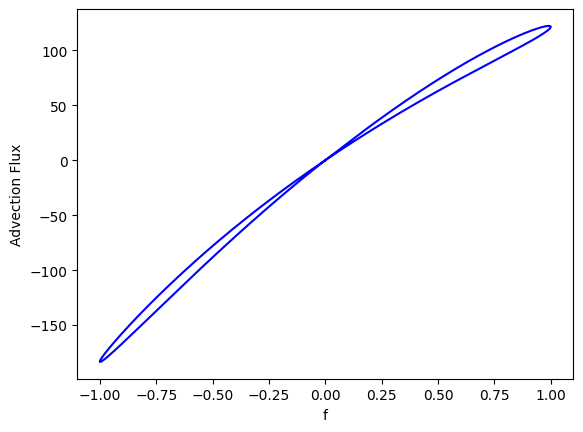

In [7]:
#Code block with all paramters for M1

w = 0.06 #frequency of forcing 60mHz
t = np.linspace(0,2*np.pi/w,2001)

f = 1*np.sin(w*t) #sinusoidal forcing f from -1 to +1

c_l = 10 #concentration of left reservoir
c_r = 100 #concentration of right reservoir

dt = t[1]-t[0] #time step

#intial parameters
ca = np.zeros(len(t))
ca[0] = 60
cb = np.zeros(len(t))
cb[0] = 91
da = np.zeros(len(t))
da[0]= 125
db = np.zeros(len(t))

alpha_a =  0.8 # adsorption rate of a+ ions
beta_b = 0.0003 #adorption rate of b- ions
lambda_a = 0.4 #desportion rate of a+ ions
lambda_b = 0.0009 #desorption rate of b- ions

#0.001 in the numerator below is interaction strength between a+b- for chances
#of them pairing up. delta is the voltage-dependent interaction function
def delta(f):
  return 0.001/(1+np.exp(np.abs(3*f)))

#depletion function
def x(f):
  gamma = 0 #gamma = 0
  return np.exp(-gamma*(f**2))

for i in range(-1+len(t)):
  ca_dot = -ca[i] + x(f[i])*(0.5*(c_l+c_r) + 0.5*f[i]*(c_l - c_r) - (alpha_a*ca[i] - beta_b*cb[i]- lambda_a*da[i] - delta(f[i])*ca[i]*cb[i]))
  cb_dot = -cb[i] + x(f[i])*(0.5*(c_l+c_r) - 0.5*f[i]*(c_l - c_r) - (-beta_b*cb[i] - alpha_a*ca[i]- lambda_b*db[i] + delta(f[i])*ca[i]*cb[i]))

  #depletion factor gamma is kept 0 in above
  da_dot = alpha_a*ca[i] - beta_b*cb[i]- lambda_a*da[i] - delta(f[i])*ca[i]*cb[i]
  db_dot = -beta_b*cb[i] - alpha_a*ca[i]- lambda_b*db[i] + delta(f[i])*ca[i]*cb[i]

  ca[i+1] = ca[i] + dt*ca_dot
  cb[i+1] = cb[i] + dt*cb_dot
  da[i+1] = da[i] + dt*da_dot
  db[i+1] = db[i] + dt*db_dot
sigma = ca+cb #G = conductance

plt.plot(f,sigma*f, color = 'blue')
plt.ylabel('Advection Flux')
plt.xlabel('f')
df = pd.DataFrame({'f': f, 'sigma_f': sigma*f, 'sigma':sigma})
df.to_csv('M1.csv', index= False)

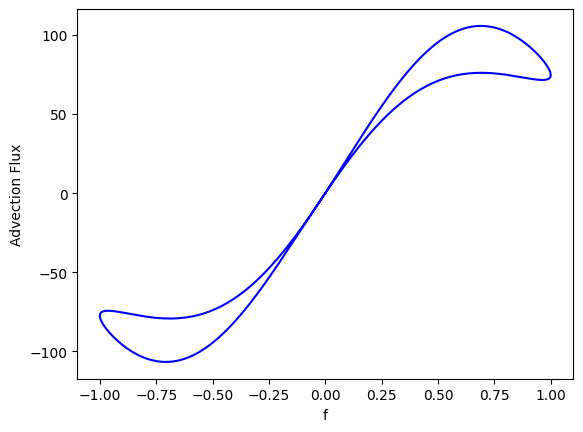

In [8]:
#Code block with all paramters for M2
w = 0.1 #frequency of forcing 100mHz
t = np.linspace(0,2*np.pi/w,2001)

f = 1*np.sin(w*t) #sinusoidal forcing f from -1 to +1

c_l = 70 #concentration of left reservoir
c_r = 100 #concentration of right reservoir

dt = t[1]-t[0] #time step

#intial parameters
ca = np.zeros(len(t))
ca[0] = 80
cb = np.zeros(len(t))
cb[0] = 140
da = np.zeros(len(t))
da[0]= 140
db = np.zeros(len(t))

alpha_a =  0.8 # adsorption rate of a+ ions
beta_b = 0.0003 #adorption rate of b- ions
lambda_a = 0.4 #desportion rate of a+ ions
lambda_b = 0.0009 #desorption rate of b- ions


#0.001 in the numerator below is interaction strength between a+b- for chances
#of them pairing up. delta is the voltage-dependent interaction function
def delta(f):
  return 0.001/(1+np.exp(np.abs(3*f)))

#depletion function
def x(f):
  gamma = 1 #gamma = 1
  return np.exp(-gamma*(f**2))

for i in range(-1+len(t)):
  ca_dot = -ca[i] + x(f[i])*(0.5*(c_l+c_r) + 0.5*f[i]*(c_l - c_r) - (alpha_a*ca[i] - beta_b*cb[i]- lambda_a*da[i] - delta(f[i])*ca[i]*cb[i]))
  cb_dot = -cb[i] + x(f[i])*(0.5*(c_l+c_r) - 0.5*f[i]*(c_l - c_r) - (-beta_b*cb[i] - alpha_a*ca[i]- lambda_b*db[i] + delta(f[i])*ca[i]*cb[i]))

  #depletion factor gamma is kept 1 in above
  da_dot = alpha_a*ca[i] - beta_b*cb[i]- lambda_a*da[i] - delta(f[i])*ca[i]*cb[i]
  db_dot = -beta_b*cb[i] - alpha_a*ca[i]- lambda_b*db[i] + delta(f[i])*ca[i]*cb[i]

  ca[i+1] = ca[i] + dt*ca_dot
  cb[i+1] = cb[i] + dt*cb_dot
  da[i+1] = da[i] + dt*da_dot
  db[i+1] = db[i] + dt*db_dot

sigma = ca+cb #G = conductance

plt.plot(f,sigma*f, color = 'blue')
plt.ylabel('Advection Flux')
plt.xlabel('f')
df.to_csv('M2.csv', index= False)

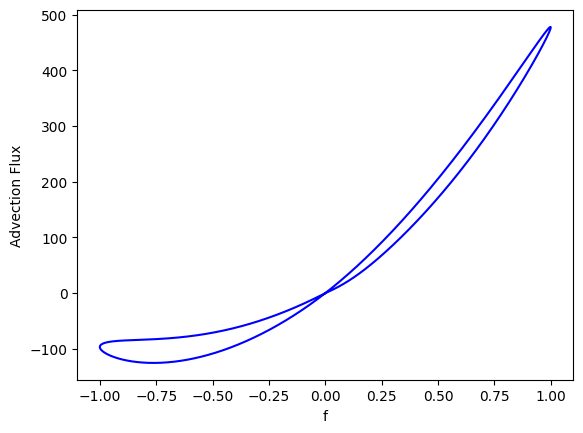

In [9]:
#Code block with all paramters for M3

w = 0.075 #frequency of forcing 75mHz
t = np.linspace(0,2*np.pi/w,2001)

f = 1*np.sin(w*t) #sinusoidal forcing f from -1 to +1

c_l = 10 #concentration of left reservoir
c_r = 100 #concentration of right reservoir

dt = t[1]-t[0] #time step

#intial parameters
ca = np.zeros(len(t))
ca[0] = 83
cb = np.zeros(len(t))
cb[0] = 100
da = np.zeros(len(t))
da[0] = -200
db = np.zeros(len(t))

alpha_a =  0.0003 # adsorption rate of a+ ions
beta_b = 0.8 #adorption rate of b- ions
lambda_a = 0.4 #desportion rate of a+ ions
lambda_b = 0.0009 #desorption rate of b- ions

#0.001 in the numerator below is interaction strength between a+b- for chances
#of them pairing up. delta is the voltage-dependent interaction function
def delta(f):
  return 0.001/(1+np.exp(np.abs(3*f)))

#depletion function
def x(f):
  gamma = 0 #gamma = 0
  return np.exp(-gamma*(f**2))

for i in range(-1+len(t)):
  ca_dot = -ca[i] + x(f[i])*(0.5*(c_l+c_r) + 0.5*f[i]*(c_l - c_r) - (alpha_a*ca[i] - beta_b*cb[i]- lambda_a*da[i] - delta(f[i])*ca[i]*cb[i]))
  cb_dot = -cb[i] + x(f[i])*(0.5*(c_l+c_r) - 0.5*f[i]*(c_l - c_r) - (-beta_b*cb[i] - alpha_a*ca[i]- lambda_b*db[i] + delta(f[i])*ca[i]*cb[i]))

  #depletion factor gamma is kept 0 in above
  da_dot = alpha_a*ca[i] - beta_b*cb[i]- lambda_a*da[i] - delta(f[i])*ca[i]*cb[i]
  db_dot = -beta_b*cb[i] - alpha_a*ca[i]- lambda_b*db[i] + delta(f[i])*ca[i]*cb[i]

  ca[i+1] = ca[i] + dt*ca_dot
  cb[i+1] = cb[i] + dt*cb_dot
  da[i+1] = da[i] + dt*da_dot
  db[i+1] = db[i] + dt*db_dot
sigma = ca+cb #G = conductance

plt.plot(f,sigma*f, color = 'blue')
plt.ylabel('Advection Flux')
plt.xlabel('f')
df = pd.DataFrame({'f': f, 'sigma_f': sigma*f, 'sigma':sigma})
df.to_csv('M3.csv', index= False)

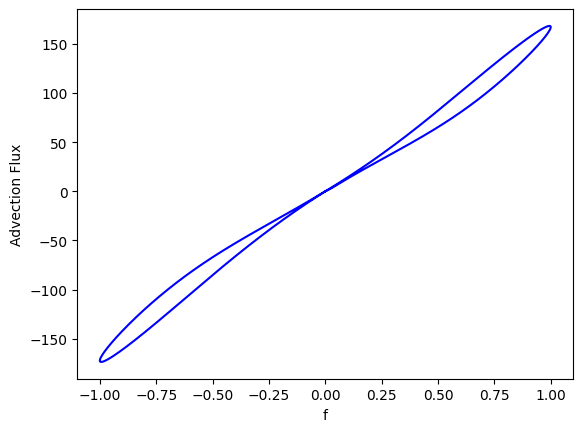

In [10]:
#Code block with all paramters for M4

w = 0.035 #frequency of forcing 35mHz
t = np.linspace(0,2*np.pi/w,2001)

f = 1*np.sin(w*t) #sinusoidal forcing f from -1 to +1

c_l = 70 #concentration of left reservoir
c_r = 100 #concentration of right reservoir

dt = t[1]-t[0] #time step

#intial parameters
ca = np.zeros(len(t))
ca[0] = 93
cb = np.zeros(len(t))
da = np.zeros(len(t))
da[0] = -1000
db = np.zeros(len(t))
db[0] = 3000

alpha_a =  0.12 # adsorption rate of a+ ions
beta_b = 0.005 #adorption rate of b- ions
lambda_a = 0.05 #desportion rate of a+ ions
lambda_b = 0.005 #desorption rate of b- ions

#0.001 in the numerator below is interaction strength between a+b- for chances
#of them pairing up. delta is the voltage-dependent interaction function
def delta(f):
  return 0.1/(1+np.exp(np.abs(4*f)))

#depletion function
def x(f):
  gamma = 0 #gamma = 1
  return np.exp(-gamma*(f**2))

for i in range(-1+len(t)):
  ca_dot = -ca[i] + x(f[i])*(0.5*(c_l+c_r) + 0.5*f[i]*(c_l - c_r) - (alpha_a*ca[i] - beta_b*cb[i]- lambda_a*da[i] - delta(f[i])*ca[i]*cb[i]))
  cb_dot = -cb[i] + x(f[i])*(0.5*(c_l+c_r) - 0.5*f[i]*(c_l - c_r) - (-beta_b*cb[i] - alpha_a*ca[i]- lambda_b*db[i] + delta(f[i])*ca[i]*cb[i]))

  #depletion factor gamma is kept 0 in above
  da_dot = alpha_a*ca[i] - beta_b*cb[i]- lambda_a*da[i] - delta(f[i])*ca[i]*cb[i]
  db_dot = -beta_b*cb[i] - alpha_a*ca[i]- lambda_b*db[i] + delta(f[i])*ca[i]*cb[i]

  ca[i+1] = ca[i] + dt*ca_dot
  cb[i+1] = cb[i] + dt*cb_dot
  da[i+1] = da[i] + dt*da_dot
  db[i+1] = db[i] + dt*db_dot
sigma = ca+cb #G = conductance

plt.plot(f,sigma*f, color = 'blue')
plt.ylabel('Advection Flux')
plt.xlabel('f')
df.to_csv('M4.csv', index= False)